In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msg
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Ques 1 - Win ?

In [7]:
main_df = df1[((df1['team1'] == 'Kings XI Punjab') & (df1['team2'] == 'Mumbai Indians')) | ((df1['team1'] == 'Mumbai Indians') & (df1['team2'] == 'Kings XI Punjab'))]
main_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
21,22,2017,Indore,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin,NaN
49,50,2017,Mumbai,2017-05-11,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,7,0,WP Saha,Wankhede Stadium,A Deshmukh,A Nand Kishore,NaN
68,69,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN
105,106,2008,Mumbai,2008-05-21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar,NaN
134,135,2009,Durban,2009-04-29,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Kings XI Punjab,3,0,KC Sangakkara,Kingsmead,MR Benson,SL Shastri,NaN
156,157,2009,Centurion,2009-05-12,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Mumbai Indians,0,8,Harbhajan Singh,SuperSport Park,SS Hazare,RE Koertzen,NaN
200,201,2010,Mumbai,2010-03-30,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,SL Malinga,Brabourne Stadium,BR Doctrove,SK Tarapore,NaN
214,215,2010,Chandigarh,2010-04-09,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",M Erasmus,AM Saheba,NaN
272,273,2011,Mumbai,2011-05-02,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Mumbai Indians,23,0,KA Pollard,Wankhede Stadium,HDPK Dharmasena,PR Reiffel,NaN
286,287,2011,Chandigarh,2011-05-10,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,76,0,BA Bhatt,"Punjab Cricket Association Stadium, Mohali",SK Tarapore,RJ Tucker,NaN


In [8]:
main_df['winner'].value_counts()

Mumbai Indians     13
Kings XI Punjab    11
Name: winner, dtype: int64

In [9]:
# Acc to this stats
# Mi - 13 win
# KXP - 11 win

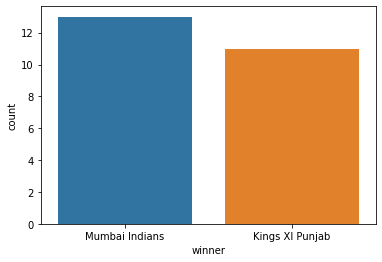

In [10]:
sb.countplot(main_df['winner'])

# Ques 1 ans - MI win

In [11]:
##################################################################################################################33

# Ques 2 - Which bowler will out Quinton De Kock ?

In [17]:
# mi against kxp
main_df_mi = df[(((df['batting_team'] == 'Mumbai Indians')  & ((df['bowling_team'] == 'Kings XI Punjab'))))]
main_df_mi

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5182,22,2,Mumbai Indians,Kings XI Punjab,1,1,PA Patel,JC Buttler,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5183,22,2,Mumbai Indians,Kings XI Punjab,1,2,JC Buttler,PA Patel,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5184,22,2,Mumbai Indians,Kings XI Punjab,1,3,PA Patel,JC Buttler,Sandeep Sharma,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
5185,22,2,Mumbai Indians,Kings XI Punjab,1,4,PA Patel,JC Buttler,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5186,22,2,Mumbai Indians,Kings XI Punjab,1,5,JC Buttler,PA Patel,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170579,11315,2,Mumbai Indians,Kings XI Punjab,20,3,KA Pollard,A Joseph,AS Rajpoot,0,...,0,0,0,0,0,0,0,KA Pollard,caught,DA Miller
170580,11315,2,Mumbai Indians,Kings XI Punjab,20,4,A Joseph,RD Chahar,AS Rajpoot,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170581,11315,2,Mumbai Indians,Kings XI Punjab,20,5,A Joseph,RD Chahar,AS Rajpoot,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170582,11315,2,Mumbai Indians,Kings XI Punjab,20,6,RD Chahar,A Joseph,AS Rajpoot,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [18]:
main_df_mi['batsman'].unique()

array(['PA Patel', 'JC Buttler', 'N Rana', 'HH Pandya', 'LMP Simmons',
       'RG Sharma', 'KA Pollard', 'KV Sharma', 'Harbhajan Singh',
       'L Ronchi', 'ST Jayasuriya', 'RV Uthappa', 'DJ Bravo', 'SS Tiwary',
       'SM Pollock', 'AM Nayar', 'MA Khote', 'DS Kulkarni', 'A Nehra',
       'SR Tendulkar', 'DR Smith', 'PR Shah', 'SD Chitnis',
       'CRD Fernando', 'VS Yeligati', 'S Dhawan', 'JP Duminy',
       'AM Rahane', 'AT Rayudu', 'R Sathish', 'R McLaren', 'Z Khan',
       'DJ Jacobs', 'A Symonds', 'AC Blizzard', 'TL Suman', 'MM Patel',
       'JEC Franklin', 'KD Karthik', 'NLTC Perera', 'RJ Peterson',
       'GJ Maxwell', 'AP Tare', 'R Dhawan', 'NM Coulter-Nile',
       'SL Malinga', 'BR Dunk', 'CM Gautam', 'CJ Anderson', 'MEK Hussey',
       'AJ Finch', 'J Suchith', 'UBT Chand', 'KH Pandya', 'TG Southee',
       'MJ McClenaghan', 'JJ Bumrah', 'AS Yadav', 'E Lewis',
       'Ishan Kishan', 'BCJ Cutting', 'M Markande', 'Q de Kock',
       'Yuvraj Singh', 'SD Lad', 'A Joseph', 'RD Ch

In [20]:
# Quinton
main_df_mi_dk_all = df[(((df['batting_team'] == 'Mumbai Indians')  & ((df['batsman'] == 'Q de Kock'))))]
main_df_mi_dk_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165333,11139,2,Mumbai Indians,Delhi Capitals,1,2,Q de Kock,RG Sharma,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165340,11139,2,Mumbai Indians,Delhi Capitals,2,3,Q de Kock,RG Sharma,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165344,11139,2,Mumbai Indians,Delhi Capitals,3,1,Q de Kock,RG Sharma,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165346,11139,2,Mumbai Indians,Delhi Capitals,3,3,Q de Kock,RG Sharma,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
165347,11139,2,Mumbai Indians,Delhi Capitals,3,4,Q de Kock,RG Sharma,TA Boult,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178851,11415,1,Mumbai Indians,Chennai Super Kings,4,3,Q de Kock,RG Sharma,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178855,11415,1,Mumbai Indians,Chennai Super Kings,5,1,Q de Kock,RG Sharma,SN Thakur,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178857,11415,1,Mumbai Indians,Chennai Super Kings,5,3,Q de Kock,RG Sharma,SN Thakur,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178858,11415,1,Mumbai Indians,Chennai Super Kings,5,4,Q de Kock,RG Sharma,SN Thakur,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [23]:
main_df_mi_bowler_all = main_df_mi_dk_all[main_df_mi_dk_all['player_dismissed'].notna()]

In [24]:
main_df_mi_bowler_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165366,11139,2,Mumbai Indians,Delhi Capitals,6,5,Q de Kock,Yuvraj Singh,I Sharma,0,...,0,0,0,0,0,0,0,Q de Kock,caught,TA Boult
166239,11143,1,Mumbai Indians,Royal Challengers Bangalore,7,3,Q de Kock,RG Sharma,YS Chahal,0,...,0,0,0,0,0,0,0,Q de Kock,bowled,NaN
166772,11145,1,Mumbai Indians,Kings XI Punjab,13,7,Q de Kock,Yuvraj Singh,Mohammed Shami,0,...,0,0,0,0,0,0,0,Q de Kock,lbw,NaN
168196,11151,1,Mumbai Indians,Chennai Super Kings,3,3,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,Q de Kock,caught,KM Jadhav
169214,11310,1,Mumbai Indians,Sunrisers Hyderabad,9,2,Q de Kock,Ishan Kishan,S Kaul,0,...,0,0,0,0,0,0,0,Q de Kock,caught,DJ Hooda
170509,11315,2,Mumbai Indians,Kings XI Punjab,9,5,Q de Kock,KA Pollard,R Ashwin,0,...,0,0,0,0,0,0,0,Q de Kock,caught,DA Miller
171180,11318,1,Mumbai Indians,Rajasthan Royals,19,3,Q de Kock,HH Pandya,J Archer,0,...,0,0,0,0,0,0,0,Q de Kock,caught,JC Buttler
172209,11322,2,Mumbai Indians,Royal Challengers Bangalore,8,4,Q de Kock,AS Yadav,M Ali,0,...,0,0,0,0,0,0,0,Q de Kock,lbw,NaN
173347,11327,1,Mumbai Indians,Rajasthan Royals,15,3,Q de Kock,HH Pandya,S Gopal,0,...,0,0,0,0,0,0,0,Q de Kock,caught,BA Stokes
175204,11335,1,Mumbai Indians,Chennai Super Kings,3,5,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,Q de Kock,caught,AT Rayudu


In [25]:
main_df_mi_bowler_all['bowler'].value_counts()

DL Chahar          2
SN Thakur          1
J Archer           1
M Ali              1
R Ashwin           1
SP Narine          1
S Gopal            1
I Sharma           1
P Krishna          1
S Kaul             1
Harbhajan Singh    1
Mohammed Shami     1
YS Chahal          1
Name: bowler, dtype: int64

In [27]:
main_df_mi_dk = df[(( (df['batsman'] == 'Q de Kock') & (df['bowling_team'] == 'Kings XI Punjab')))]
main_df_mi_dk

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
95921,405,2,Sunrisers Hyderabad,Kings XI Punjab,1,1,Q de Kock,PA Reddy,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
95922,405,2,Sunrisers Hyderabad,Kings XI Punjab,1,2,Q de Kock,PA Reddy,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
95923,405,2,Sunrisers Hyderabad,Kings XI Punjab,1,3,Q de Kock,PA Reddy,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
95924,405,2,Sunrisers Hyderabad,Kings XI Punjab,1,4,Q de Kock,PA Reddy,P Kumar,0,...,0,0,0,0,0,0,0,Q de Kock,bowled,NaN
137867,583,2,Delhi Daredevils,Kings XI Punjab,1,1,Q de Kock,SS Iyer,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170504,11315,2,Mumbai Indians,Kings XI Punjab,8,6,Q de Kock,KA Pollard,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170505,11315,2,Mumbai Indians,Kings XI Punjab,9,1,Q de Kock,KA Pollard,R Ashwin,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
170506,11315,2,Mumbai Indians,Kings XI Punjab,9,2,Q de Kock,KA Pollard,R Ashwin,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170507,11315,2,Mumbai Indians,Kings XI Punjab,9,3,Q de Kock,KA Pollard,R Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [28]:
main_df_mi_bowler_kxp = main_df_mi_dk[main_df_mi_dk['player_dismissed'].notna()]
main_df_mi_bowler_kxp

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
95924,405,2,Sunrisers Hyderabad,Kings XI Punjab,1,4,Q de Kock,PA Reddy,P Kumar,0,...,0,0,0,0,0,0,0,Q de Kock,bowled,NaN
144840,612,2,Delhi Daredevils,Kings XI Punjab,8,5,Q de Kock,SV Samson,MP Stoinis,0,...,0,0,0,0,0,0,0,Q de Kock,caught,AR Patel
152236,7901,2,Royal Challengers Bangalore,Kings XI Punjab,12,2,Q de Kock,AB de Villiers,R Ashwin,0,...,0,0,0,0,0,0,0,Q de Kock,bowled,NaN
166772,11145,1,Mumbai Indians,Kings XI Punjab,13,7,Q de Kock,Yuvraj Singh,Mohammed Shami,0,...,0,0,0,0,0,0,0,Q de Kock,lbw,NaN
170509,11315,2,Mumbai Indians,Kings XI Punjab,9,5,Q de Kock,KA Pollard,R Ashwin,0,...,0,0,0,0,0,0,0,Q de Kock,caught,DA Miller


In [29]:
main_df_mi_bowler_kxp['bowler'].value_counts()

R Ashwin          2
P Kumar           1
Mohammed Shami    1
MP Stoinis        1
Name: bowler, dtype: int64

In [30]:
## according to the stats , De Kock gets out by Seamers / fast

# Ques 2 ans -Seam Fast

In [31]:
###############################################################################################################################

# Ques 3 - Wickets loss by kxp in pp

In [34]:
# kxp against mi
main_df_kxp = df[(((df['batting_team'] == 'Kings XI Punjab')  & ((df['bowling_team'] == 'Mumbai Indians'))))]
main_df_kxp

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5055,22,1,Kings XI Punjab,Mumbai Indians,1,1,HM Amla,SE Marsh,HH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5056,22,1,Kings XI Punjab,Mumbai Indians,1,2,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5057,22,1,Kings XI Punjab,Mumbai Indians,1,3,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
5058,22,1,Kings XI Punjab,Mumbai Indians,1,4,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5059,22,1,Kings XI Punjab,Mumbai Indians,1,5,SE Marsh,HM Amla,HH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170452,11315,1,Kings XI Punjab,Mumbai Indians,20,2,KL Rahul,Mandeep Singh,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170453,11315,1,Kings XI Punjab,Mumbai Indians,20,3,KL Rahul,Mandeep Singh,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170454,11315,1,Kings XI Punjab,Mumbai Indians,20,4,KL Rahul,Mandeep Singh,JJ Bumrah,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
170455,11315,1,Kings XI Punjab,Mumbai Indians,20,5,KL Rahul,Mandeep Singh,JJ Bumrah,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN


In [35]:
main_df_kxp_pp = main_df_kxp[main_df_kxp['over'] <=6]

In [37]:
main_df_kxp_pp['over'].value_counts()

4    151
6    150
5    148
2    148
1    148
3    147
Name: over, dtype: int64

In [39]:
main_df_kxp_pp['player_dismissed'].notna().sum()

28

In [41]:
main_df_kxp['match_id'].nunique()

24

In [42]:
28 / 24

1.1666666666666667

In [45]:
# 1.16 wickets in  pp againt mi

In [47]:
main_df_kxp_all = df[(((df['batting_team'] == 'Kings XI Punjab')))]
main_df_kxp_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
838,4,2,Kings XI Punjab,Rising Pune Supergiant,1,1,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
839,4,2,Kings XI Punjab,Rising Pune Supergiant,1,2,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
840,4,2,Kings XI Punjab,Rising Pune Supergiant,1,3,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
841,4,2,Kings XI Punjab,Rising Pune Supergiant,1,4,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
842,4,2,Kings XI Punjab,Rising Pune Supergiant,1,5,M Vohra,HM Amla,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177869,11346,2,Kings XI Punjab,Chennai Super Kings,18,3,S Curran,Mandeep Singh,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177870,11346,2,Kings XI Punjab,Chennai Super Kings,18,4,S Curran,Mandeep Singh,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177871,11346,2,Kings XI Punjab,Chennai Super Kings,18,5,Mandeep Singh,S Curran,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177872,11346,2,Kings XI Punjab,Chennai Super Kings,17,6,Mandeep Singh,S Curran,RA Jadeja,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [49]:
main_df_kxp_pp_all = main_df_kxp_all[main_df_kxp_all['over'] <=6]

In [50]:
main_df_kxp_pp_all['over'].value_counts()

1    1117
2    1109
3    1102
6    1097
5    1090
4    1085
Name: over, dtype: int64

In [51]:
main_df_kxp_pp_all['player_dismissed'].notna().sum()

268

In [52]:
main_df_kxp_pp_all['match_id'].nunique()

176

In [54]:
268 / 176

1.5227272727272727

In [55]:
# avg wickets == (1.52 + 1.16) / 2
(1.52+1.16) / 2

1.3399999999999999

# Ques 3 ans - (0-1) wickets by kxp

In [57]:
###########################################################################################################################

# Ques 4 - KL out ?

In [59]:
main_df_kxp_kl = main_df_kxp[main_df_kxp['batsman'] == 'KL Rahul']

In [61]:
main_df_kxp_kl['dismissal_kind'].value_counts()

caught    2
Name: dismissal_kind, dtype: int64

In [62]:
main_df_kxp_kl = main_df_kxp_all[main_df_kxp_all['batsman'] == 'KL Rahul']

In [64]:
main_df_kxp_kl['dismissal_kind'].value_counts()

caught     16
bowled      3
lbw         2
stumped     2
Name: dismissal_kind, dtype: int64

In [65]:
## acc to stats - KL rahul gets out majorily because of 'CATCH'

# Ques 4 ans  - Caught

In [66]:
###########################################################################################################################

# Ques 5 - Total Wickets fall ?

In [68]:
main_df_kxp['player_dismissed'].notna().sum()

145

In [69]:
main_df_kxp['match_id'].nunique()

24

In [70]:
145 / 24

6.041666666666667

In [72]:
# 6 wickets of kxp wrt to MI

In [74]:
main_df_kxp_all['player_dismissed'].notna().sum()

1081

In [75]:
main_df_kxp_all['match_id'].nunique()

176

In [76]:
1081 / 176

6.142045454545454

In [77]:
# 6.1 avg wickets of KXP wrt to all team

In [79]:
main_df_mi['player_dismissed'].notna().sum()

149

In [80]:
main_df_mi['match_id'].nunique()

24

In [81]:
149  / 24

6.208333333333333

In [82]:
# 6.2 avg wickets by mi wrt kxp

In [86]:
main_df_mi_all = df[(((df['batting_team'] == 'Mumbai Indians')))]
main_df_mi_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
248,2,1,Mumbai Indians,Rising Pune Supergiant,1,1,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
249,2,1,Mumbai Indians,Rising Pune Supergiant,1,2,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
250,2,1,Mumbai Indians,Rising Pune Supergiant,1,3,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
251,2,1,Mumbai Indians,Rising Pune Supergiant,1,4,JC Buttler,PA Patel,AB Dinda,0,...,0,0,0,0,5,0,5,NaN,NaN,NaN
252,2,1,Mumbai Indians,Rising Pune Supergiant,1,5,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178949,11415,1,Mumbai Indians,Chennai Super Kings,20,2,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178950,11415,1,Mumbai Indians,Chennai Super Kings,20,3,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178951,11415,1,Mumbai Indians,Chennai Super Kings,20,4,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,1,0,1,MJ McClenaghan,run out,F du Plessis
178952,11415,1,Mumbai Indians,Chennai Super Kings,20,5,KA Pollard,JJ Bumrah,DJ Bravo,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [87]:
main_df_mi_all['player_dismissed'].notna().sum()

1117

In [88]:
main_df_mi_all['match_id'].nunique()

187

In [89]:
1117 / 187

5.973262032085562

In [91]:
# 6 avg wickets by mi wrt to all team

In [92]:
## Therefore there will be around total 12 wickets fall

# Ques 5 ans - (11 -15)